In [34]:
# Importamos las librerías para trabajar con BFS(Breadth-First Search)
# Búsqueda en amplitud

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

In [51]:
# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'E'],
    'C': ['A', 'E'],
    'D': ['A', 'F'],
    'E': ['B', 'C'],
    'F': ['D']
}

# Nodo de inicio y nodo objetivo
nodo_inicio = 'A'
nodo_objetivo = 'E'

In [52]:
# Definimos nuestro algoritmo de búsqueda:

def busqueda_amplitud(grafo, inicio, objetivo):
    # El método set crea un conjunto de datos SIMILAR a una lista pero que
    # NO puede tener elementos duplicados
    visitados = set()
    # (Doubly Ended Queue) Es un tio de lista que permite agregar y eliminar
    # elementos ya sea a la izquiera o a la derecha de la misma
    cola = deque([(inicio, [inicio])])

    caminos = []

    i = 1
    while cola:
        # Aquí removemos el primer elemento del set (El de la izquierda)
        # y este será nuestro nodo actual, el resto, el camino (Path restante)
        nodo_actual, camino = cola.popleft()
        print("\nIteración:", i)
        print("Nodo actual:", nodo_actual)
        
        if nodo_actual == objetivo:
            caminos.append(camino)
        
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            print("Nodos visitados", visitados)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    nueva_ruta = camino + [vecino]
                    print("Nueva ruta:", nueva_ruta)
                    cola.append((vecino, nueva_ruta))
        i += 1
    return caminos

In [53]:
# Realizamos la búsqueda en amplitud
caminos = busqueda_amplitud(grafo, nodo_inicio, nodo_objetivo)


Iteración: 1
Nodo actual: A
Nodos visitados {'A'}
Nueva ruta: ['A', 'B']
Nueva ruta: ['A', 'C']
Nueva ruta: ['A', 'D']

Iteración: 2
Nodo actual: B
Nodos visitados {'A', 'B'}
Nueva ruta: ['A', 'B', 'E']

Iteración: 3
Nodo actual: C
Nodos visitados {'A', 'B', 'C'}
Nueva ruta: ['A', 'C', 'E']

Iteración: 4
Nodo actual: D
Nodos visitados {'A', 'D', 'B', 'C'}
Nueva ruta: ['A', 'D', 'F']

Iteración: 5
Nodo actual: E
Nodos visitados {'A', 'E', 'B', 'C', 'D'}

Iteración: 6
Nodo actual: E

Iteración: 7
Nodo actual: F
Nodos visitados {'A', 'E', 'B', 'F', 'C', 'D'}


In [54]:
# Imprimimos los caminos encontrados
for i, camino in enumerate(caminos):
    print(f"Camino {i+1}: {' -> '.join(camino)}")

Camino 1: A -> B -> E
Camino 2: A -> C -> E


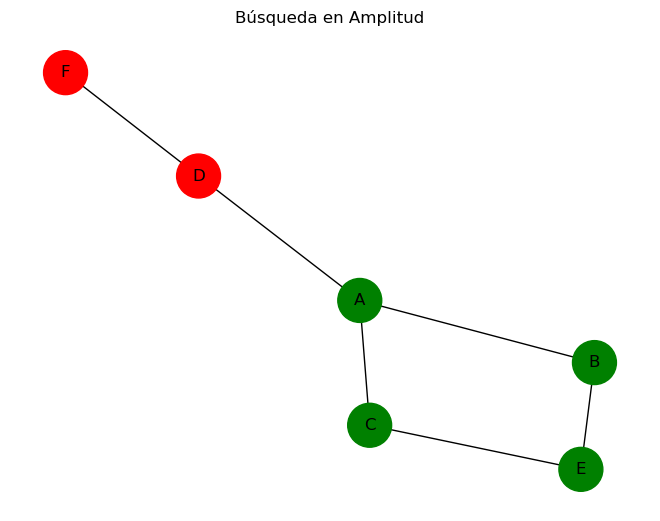

In [55]:
# Creamos el gráfico
G = nx.Graph(grafo)

# Coloreamos los nodos según si están en algún camino o no
colores = []
for nodo in G.nodes():
    en_camino = False
    for camino in caminos:
        if nodo in camino:
            en_camino = True
            break
    if en_camino:
        colores.append('green')
    else:
        colores.append('red')

# Dibujamos el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colores, node_size=1000)
plt.title("Búsqueda en Amplitud")
plt.show()